In [1]:
import kagglehub
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Download the MBA Admission dataset from Kaggle and load it into a DataFrame.
path = kagglehub.dataset_download("taweilo/mba-admission-dataset")
df = pd.read_csv(f"{path}/MBA.csv")

# Genaral EDA

In [3]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


In [5]:
'''
The dataset has 6194 MBA applications. It includes categorical columns like gender, major, race, work_industry, and admission, a boolean column international,
and numeric columns gpa, gmat, and work_exp. The application_id is just an ID for each applicant.

There are missing values in race and admission. Missing race might mean some students did not report their race. Missing admission likely means the applicant was denied.

The numeric data looks normal. GPA ranges from 2.65 to 3.77, GMAT scores from 570 to 780, and work experience from 1 to 9 years.
'''

df.describe()

,application_id,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000,6194.000000
mean,3097.500000,3.250714,651.092993,5.016952
std,1788.198115,0.151541,49.294883,1.032432
min,1.000000,2.650000,570.000000,1.000000
25%,1549.250000,3.150000,610.000000,4.000000
50%,3097.500000,3.250000,650.000000,5.000000
75%,4645.750000,3.350000,680.000000,6.000000
max,6194.000000,3.770000,780.000000,9.000000


In [6]:
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,1842
gmat,0
work_exp,0
work_industry,0
admission,5194


<Axes: >

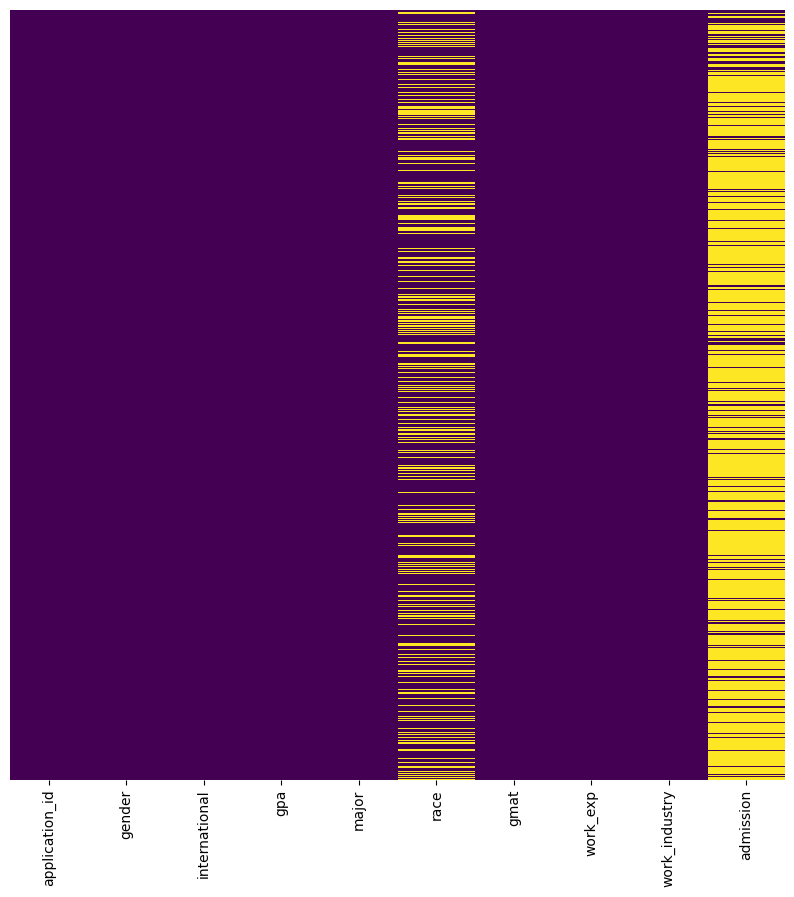

In [7]:
# Create a heatmap to visualize missing values in the dataset.
# We can see 1842 missing values in the 'race' column and 5194 missing values in the 'admission' column.
# Missing 'race' likely means some applicants chose not to report their race.
# Missing 'admission' most likely means the applicants were denied admission.
# These missing values are meaningful, therefore, we should not drop the rows or remove these columns.

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap="viridis")

In [8]:
# Fill missing admission with 'Denied'
df['admission'] = df['admission'].fillna('Denied')

# Fill missing race with 'Unknown'
df['race'] = df['race'].fillna('Unknown')

In [9]:
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Denied
2,3,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Denied
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Denied


In [10]:
# There is no more missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            6194 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       6194 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


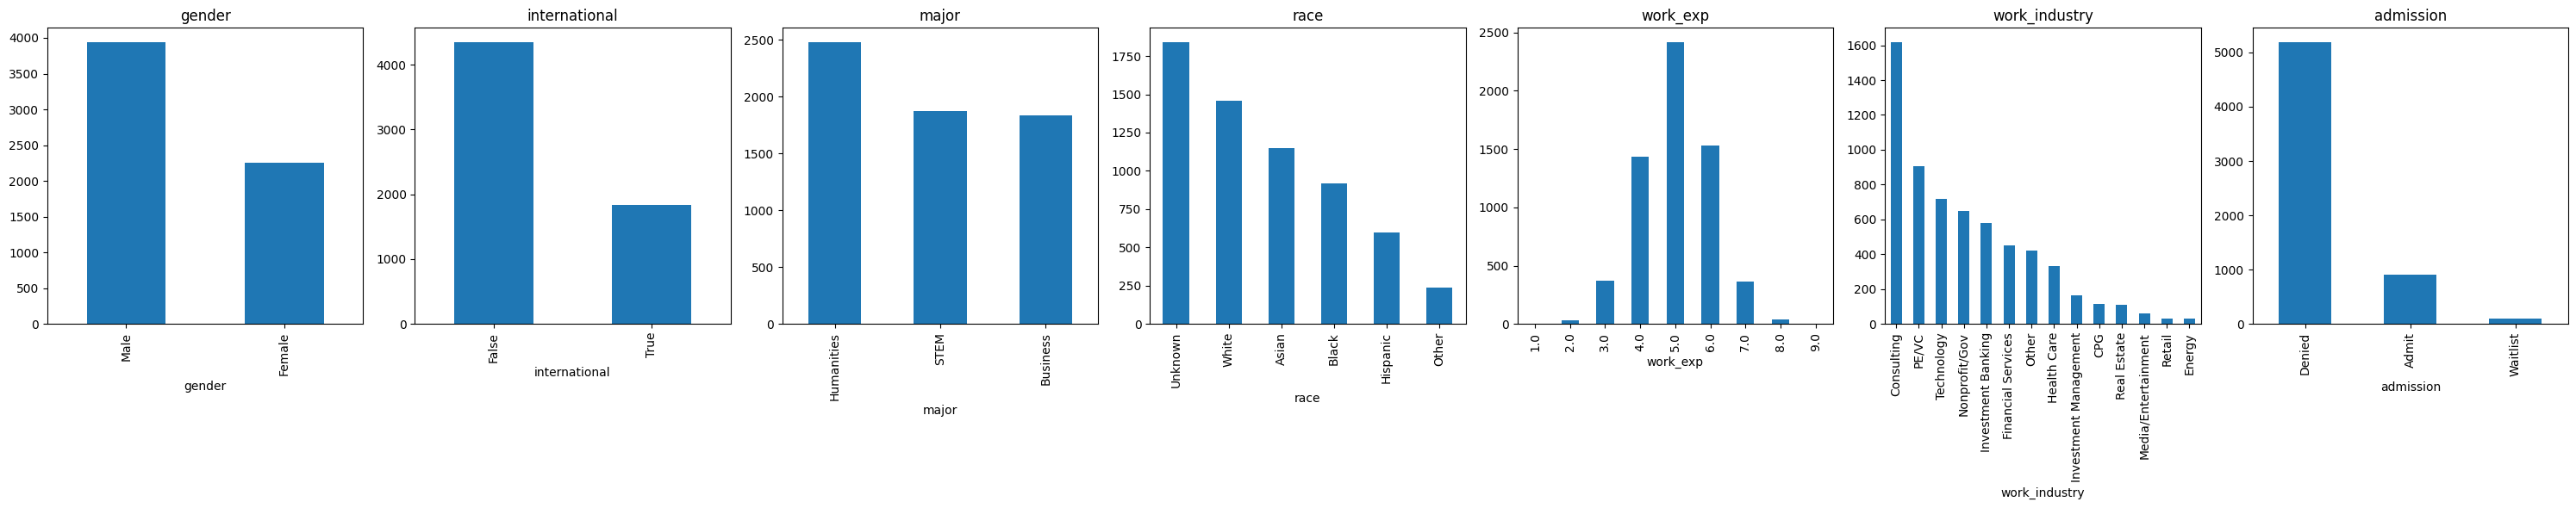

In [11]:
# Create bar plots for selected columns to visualize the distribution of each category.
# For 'work_exp', we sort the values by order since it is numeric, which helps us better understand the spread.
# This helps us see how each categorical column is structured and what the value counts are.
# It also shows how the number of entries in each category compares with others (for example, how many Males vs Females).

columns = ['gender', 'international', 'major', 'race', 'work_exp', 'work_industry', 'admission']
num_columns = len(columns)

plt.figure(figsize=(30, 6))

for i in range(num_columns):
    plt.subplot(1, num_columns, i + 1)

    if columns[i] == 'work_exp':
        df[columns[i]].value_counts().sort_index().plot.bar()
    else:
        df[columns[i]].value_counts().plot.bar()

    plt.title(columns[i])

plt.tight_layout()
plt.show()

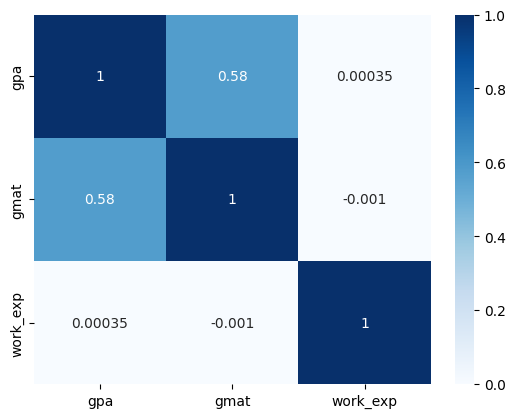

In [12]:
# Select only numeric columns and create a heatmap to show the correlation between them.
# There is a moderately strong positive correlation (0.58) between GPA and GMAT scores.
# Other than that, there are no noticeable correlations between the numeric columns.
# We will do more in depth correlation matrix analysis in the future.

df_numeric = df[['gpa', 'gmat', 'work_exp']]

sns.heatmap(df_numeric.corr(), annot=True, cmap="Blues")
plt.show()

<Axes: xlabel='gmat', ylabel='gpa'>

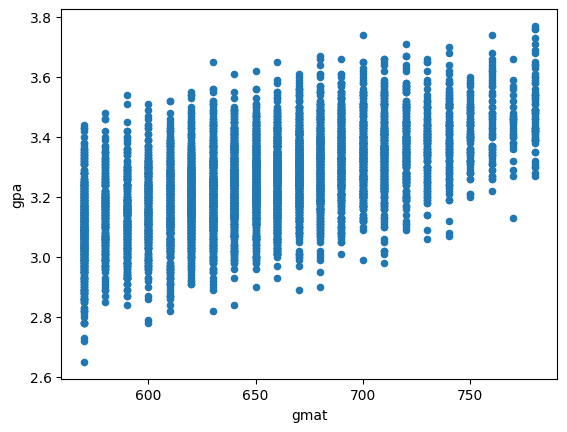

In [13]:
# This scatter plot shows that as the GMAT score increases, the GPA also tends to increase.
# We can clearly see a trend, which proves that there is a positive correlation between them.
# This makes sense because, in general, students with higher GPAs tend to perform better on the GMAT (Graduate Management Admission Test).

df.plot.scatter(x="gmat", y="gpa")

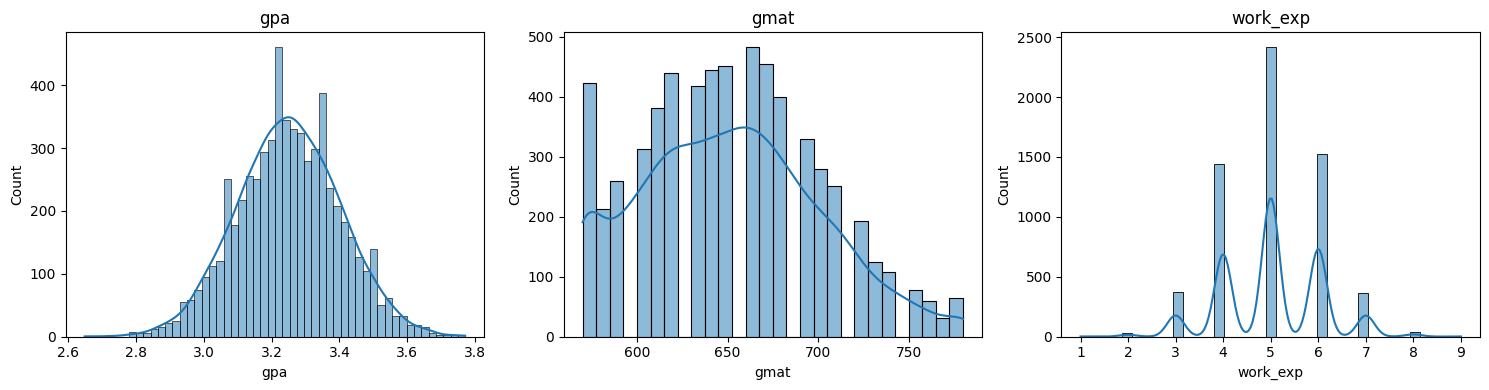

In [14]:
# Create histograms with KDE curves for GPA, GMAT, and work experience to visualize their distributions.
# This helps us see if the data is normally distributed or skewed.
# From the plots, we can see that GPA and work experience are roughly normally distributed.
# However, there is a small right-end skew in the GMAT scores, meaning a few students scored very high compared to others.

columns = ['gpa', 'gmat', 'work_exp']
num_columns = len(columns)

plt.figure(figsize=(15, 4))

for i in range(num_columns):
    data = df[columns[i]]

    plt.subplot(1, num_columns, i + 1)
    sns.histplot(data, kde=True)
    plt.title(columns[i])

plt.tight_layout()
plt.show()

# **High-level analysis**

# Correlation Matrix Analysis (GMAT, GPA, Admission)





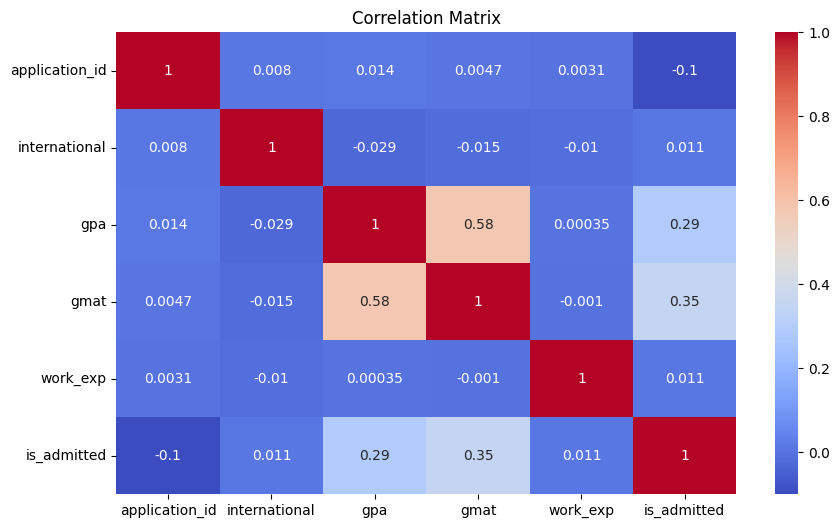

In [15]:
# We are creating a new column 'is_admitted' to convert the 'admission' column into a binary numeric format. (Ignoring waitlisted and denied values)
# This allows us to include it in the correlation matrix, as correlations can only be calculated with numeric values.
df['is_admitted'] = df['admission'].map({'Denied': 0, 'Admit': 1})

# Compute the correlation matrix for all numeric columns
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

'''
Correlation Analysis:

1. GPA and GMAT:
   Correlation: 0.58 (moderate positive)
   This means that as GMAT scores increase, GPA scores also tend to increase, indicating a significant academic relationship.
   This makes sense since students who do well in University also tend to perform well in Board Exams.

2. GMAT and Admission:
   Correlation: 0.35 (moderate positive)
   This indicates that applicants with higher GMAT scores have a slightly better chance of being admitted compared to those with lower scores.
   This might mean that the admissions office considers GMAT when making decisions.

3. GPA and Admission:
   Correlation: 0.29 (weak positive)
   This suggests that applicants with higher GPAs are slightly more likely to be admitted, but the effect is not very strong.
   This might mean that the admissions office also looks at GPA when making decisions. Further testing is needed to
   determine if this effect is significant or due to random chance.
'''

plt.show()

In [16]:
df = df.drop('is_admitted', axis=1) # No need for this column anymore
df.head()

,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,Denied
2,3,Female,True,3.30,Business,Unknown,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,Denied
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,Denied


# Visualizing Admission Trends: GMAT vs. GPA (Scatter Plot)




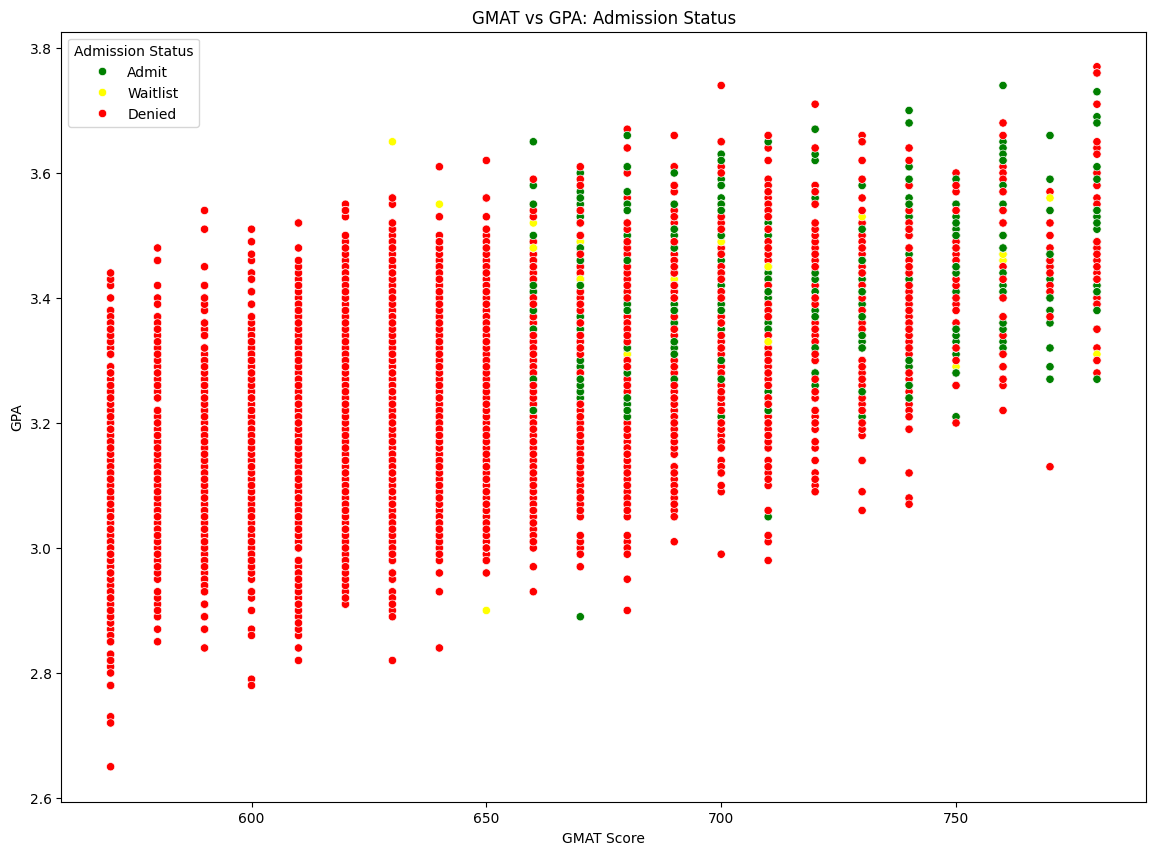

In [17]:
'''
Analysis:

The scatter plot shows that most students with low GMAT and GPA scores, located in the bottom left corner,
were denied admission. There are no outliers in this region, indicating that having low scores in both
categories significantly reduces the chances of acceptance.

From the middle of the graph, around GPA 3.2 and GMAT 675, the outcomes become mixed. Some students are
accepted, but there is no clear pattern. Even students with strong scores have different outcomes.
Two students with high GMAT and GPA scores were denied admission, making them the outliers.

This pattern suggests that while GMAT and GPA are important, they are not the only factors in the admission
decision. There may be a threshold for these scores. After reaching that level, other factors such as work
experience, extracurricular activities, or recommendation letters may play a more significant role.

Some waitlisted students have scores below the expected threshold, suggesting that exceptions might be
made for them. Further analysis would help us understand why some students with lower scores are
waitlisted instead of being denied.
'''

plt.figure(figsize=(14, 10))
sns.scatterplot(
    data=df,
    x='gmat',
    y='gpa',
    hue='admission',
    hue_order=["Admit", "Waitlist", "Denied"],
    palette=["green", "yellow", "red"],
)

plt.title("GMAT vs GPA: Admission Status")
plt.xlabel("GMAT Score")
plt.ylabel("GPA")
plt.legend(title="Admission Status")
plt.show()

# GMAT vs. GPA (Pearson Correlation and Linear Regression)

In [18]:
'''
Null Hypothesis: There is no linear relationship between GMAT and GPA scores.
Alternative Hypothesis: There is a linear relationship between GMAT and GPA scores.

Results:
Correlation Coefficient: 0.577, indicating a positive and moderate relationship.
This suggests that as GMAT scores increase, GPA scores also tend to increase. However, the correlation is moderate, meaning that while there is a noticeable positive linear trend

P-Value: 0.0, showing that the result is statistically significant.

Rejecting the Null Hypothesis:
Since the p-value is 0.0, which is less than 0.05, we reject the null hypothesis.
There is statistically significant evidence of a positive linear relationship between GMAT and GPA scores.
Higher GMAT scores are associated with higher GPA.
'''

stats.pearsonr(df['gmat'], df['gpa'])

PearsonRResult(statistic=np.float64(0.5775391334190765), pvalue=np.float64(0.0))

<Axes: xlabel='gmat', ylabel='gpa'>

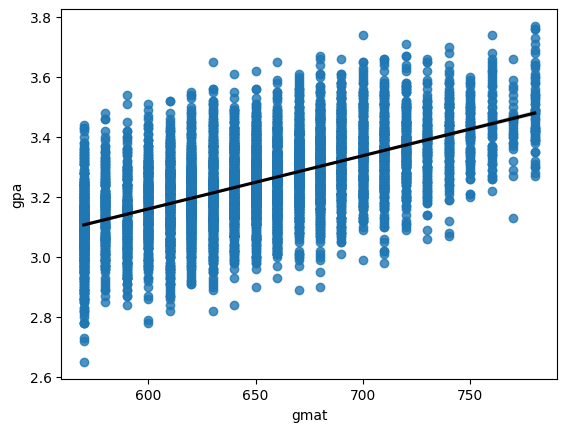

In [19]:
sns.regplot(df, x='gmat', y='gpa', line_kws={'color': 'black'})

In [20]:
'''
Analysis:

The plot shows a positive linear relationship between GMAT and GPA scores.
The black regression line slopes upwards, indicating that higher GMAT scores are generally associated with higher GPA.

Observations:
1. Slope (0.0018): For every 1 point increase in GMAT, the predicted GPA goes up by 0.0018 points.
   While the slope appears small, it is still meaningful because GPA is on a much smaller scale compared to GMAT scores.
   Even a small increase in GPA can be significant during the admissions process.

2. Intercept (2.0947): This is the predicted GPA when the GMAT score is 0. While a GMAT of 0 is not realistic, the intercept helps set the starting point of the line.

3. Correlation (0.577): The positive value shows that as GMAT scores increase, GPA tends to increase too. The relationship is moderate.

4. P-Value (0.0): The p-value is very small, meaning the relationship is statistically significant. It is unlikely that this relationship happened by chance.

5. Some points are above or below the line, suggesting the presence of outliers.

Questions:
1. Are there specific majors or industries where this relationship is stronger or weaker?
2. Are there outliers that significantly affect the slope or intercept?
'''

linregress_results = stats.linregress(df['gmat'], df['gpa'])
linregress_results

LinregressResult(slope=np.float64(0.0017754565580234624), intercept=np.float64(2.0947262691062183), rvalue=np.float64(0.5775391334190766), pvalue=np.float64(0.0), stderr=np.float64(3.189308080438955e-05), intercept_stderr=np.float64(0.02082478191586663))

# Gender and Admission Analysis (Chi-Square Test)

Text(0.5, 1.0, 'Admission Status by Gender')

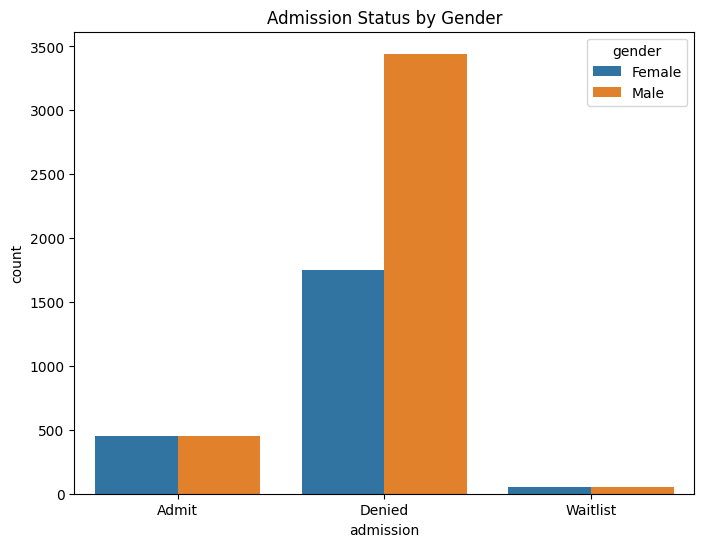

In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='admission', hue='gender')
plt.title("Admission Status by Gender")

Text(0.5, 1.0, 'Difference Between Observed and Expected Frequencies (Admission vs Gender)')

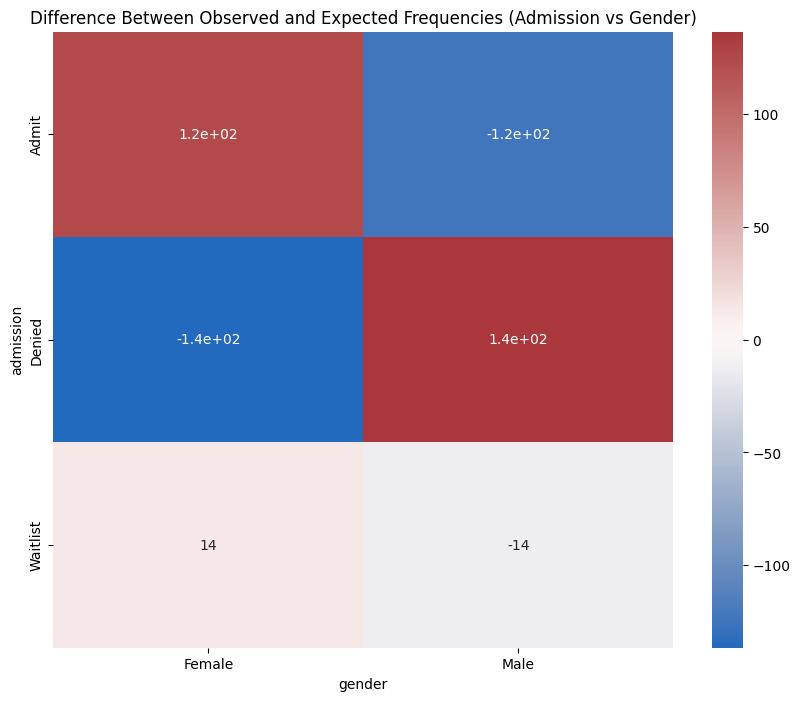

In [22]:
'''
Question:
1. Are males and females admitted at different rates, or do other factors play a more significant role?

Analysis:
The heatmap shows the differences between observed and expected frequencies for admission status by gender.
The colors indicate how much each category deviates from the expected values.

Observations:
1. Admission (Male):
   - There were 140 more denials than expected for males, indicating a higher-than-expected rejection rate for male applicants.
   - The number of male admissions was 120 fewer than expected, suggesting that fewer males were admitted than anticipated based on expected proportions.

2. Admission (Female):
   - Females had 120 more admissions than expected, showing a higher acceptance rate for female applicants.
   - The number of denials was 140 fewer than expected, indicating that fewer females were denied than expected.

3. Waitlist:
   - The waitlist category shows only minor differences, with 14 more females and 14 fewer males than expected.
   - This suggests that gender does not have a significant impact on waitlist placements.

'''

gender_admission_contingency = pd.crosstab(df['admission'], df['gender'])
gender_admission_results = stats.chi2_contingency(gender_admission_contingency)

plt.figure(figsize=(10, 8))
sns.heatmap(
    gender_admission_contingency - gender_admission_results.expected_freq,
    cmap='vlag',
    annot=True
)
plt.title("Difference Between Observed and Expected Frequencies (Admission vs Gender)")

In [23]:
'''
All the claims made above about Gender vs. Admission rates can be validated by performing statistical testing and hypothesis testing.

Null Hypothesis: There is no association between gender and admission status.
Alternative Hypothesis: There is an association between gender and admission status.

Results:
P-Value: 1.31e-21, indicating that the result is statistically significant.

Rejecting the Null Hypothesis:
Since the p-value is extremely small (less than 0.05), we can confidently reject the null hypothesis.
There is statistically significant evidence that gender and admission status are not independent.
The observed differences in admission outcomes based on gender are unlikely to have occurred by random.
'''

stats.chi2_contingency(gender_admission_contingency)

Chi2ContingencyResult(statistic=np.float64(96.16293493778068), pvalue=np.float64(1.3136630861940511e-21), dof=2, expected_freq=array([[ 327.07458831,  572.92541169],
       [1887.58379077, 3306.41620923],
       [  36.34162092,   63.65837908]]))

# International and Industry Trends (Chi-Square Test)

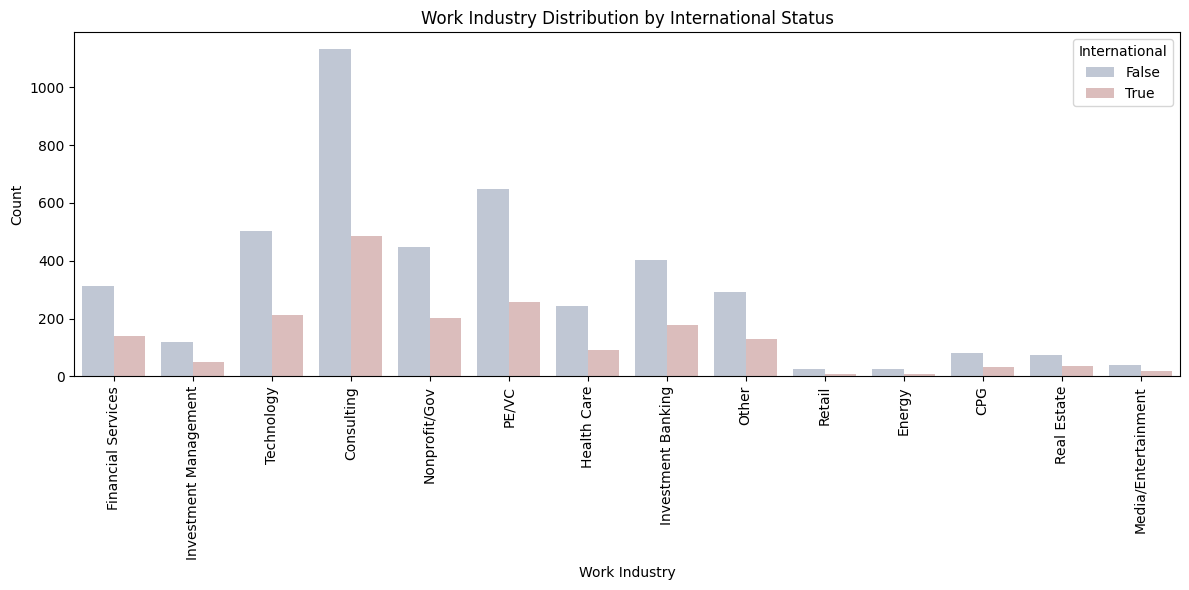

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='work_industry', hue='international', palette='vlag')
plt.xticks(rotation=90)

plt.title('Work Industry Distribution by International Status')
plt.xlabel('Work Industry')
plt.ylabel('Count')
plt.legend(title='International')
plt.tight_layout()
plt.show()

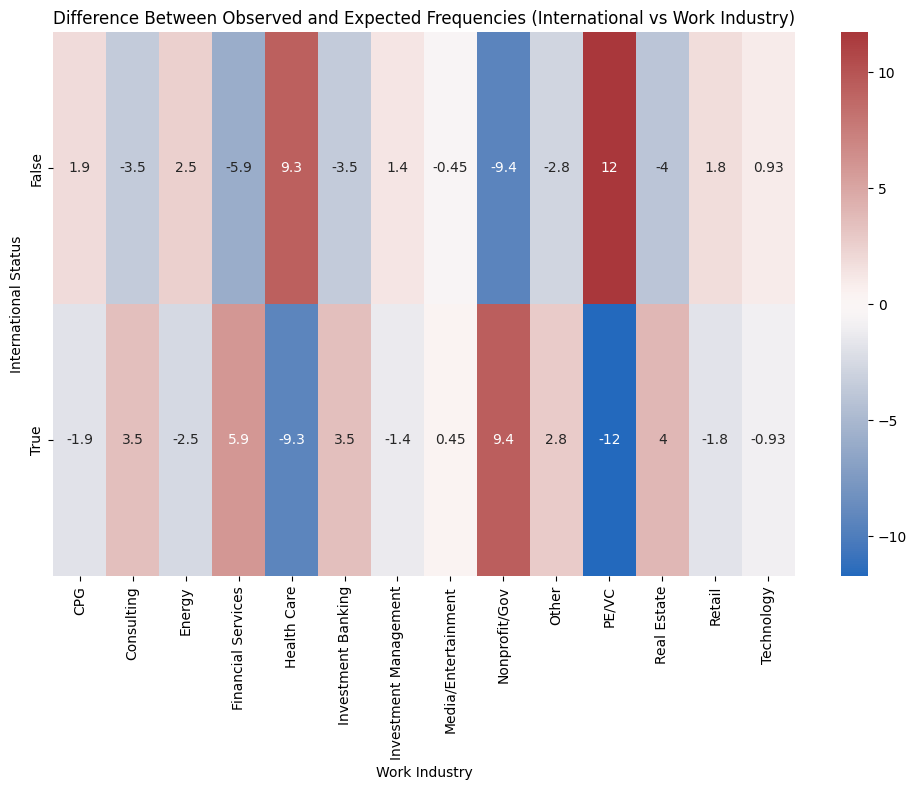

In [25]:
'''
Question:
1. Are international or domestic students more likely to work in certain industries?

Analysis:
The heatmap visualizes the differences between observed and expected frequencies for work industry by international status.

Observations:
1. PE/VC:
   - More domestic students (12) and fewer international students (-12) than expected, suggesting that domestic students are more likely to work in this sector.

2. Health Care:
   - More domestic students (9.3) and fewer international students (-9.3) than expected, indicating that international students are underrepresented in this field.

3. Nonprofit/Gov:
   - Fewer domestic students (-9.4) and more international students (9.4) than expected, suggesting a stronger international presence in this sector.
'''

international_industry_contingency = pd.crosstab(df['international'], df['work_industry'])
international_industry_results = stats.chi2_contingency(international_industry_contingency)

plt.figure(figsize=(10, 8))
sns.heatmap(
    international_industry_contingency - international_industry_results.expected_freq,
    cmap='vlag',
    annot=True
)
plt.title("Difference Between Observed and Expected Frequencies (International vs Work Industry)")
plt.xlabel("Work Industry")
plt.ylabel("International Status")
plt.tight_layout()
plt.show()

In [26]:
'''
All the claims made above about International Status vs. Work Industry can be validated by performing statistical testing and hypothesis testing.

Null Hypothesis: There is no association between international status and work industry.
Alternative Hypothesis: There is an association between international status and work industry.

Results:
P-Value: 0.9608, indicating that the result is not statistically significant.

Failing to Reject the Null Hypothesis:
Since the p-value is much greater than 0.05, we fail to reject the null hypothesis.
There is no statistically significant evidence that international status and work industry are associated.
The observed differences in work industry distribution based on international status are likely to have occurred by chance.
'''

stats.chi2_contingency(international_industry_contingency)

Chi2ContingencyResult(statistic=np.float64(5.555801025940184), pvalue=np.float64(0.9608383039984122), dof=13, expected_freq=array([[  80.09815951, 1137.53438812,   22.4836939 ,  316.87956087,
         234.67355505,  407.51695189,  116.63416209,   41.45431062,
         457.40264772,  295.80109784,  637.2721989 ,   77.99031321,
          23.18630933,  503.07265095],
       [  33.90184049,  481.46561188,    9.5163061 ,  134.12043913,
          99.32644495,  172.48304811,   49.36583791,   17.54568938,
         193.59735228,  125.19890216,  269.7278011 ,   33.00968679,
           9.81369067,  212.92734905]]))

# k-Nearest-Neighbors Classification

In [27]:
# Columns to include in the model
input_cols = ['gmat', 'gpa', 'work_exp']
target_col = 'admission'

# Split the data using random sampling
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

print(train_df.shape, val_df.shape, test_df.shape)

(4955, 10) (619, 10) (620, 10)


In [28]:
# Standardization Function
def standardize(df, columns):
    for col in columns:
        col_mean = df[col].mean()
        col_std = df[col].std()
        df[col] = (df[col] - col_mean) / col_std
    return df

# Normalize all continuous values
train_df = standardize(train_df, input_cols)
val_df = standardize(val_df, input_cols)
test_df = standardize(test_df, input_cols)

In [29]:
for K in range(1, 10):
    # Create a K-nearest-neighbors classifier object and train it
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(train_df[input_cols], train_df[target_col])

    # Make predictions with the validation df and compute accuracy
    predictions = knn.predict(val_df[input_cols])
    accuracy = accuracy_score(val_df[target_col], predictions)

    print('k:', K, 'accuracy:', accuracy)

k: 1 accuracy: 0.7883683360258481
k: 2 accuracy: 0.7851373182552503
k: 3 accuracy: 0.8239095315024233
k: 4 accuracy: 0.8109854604200323
k: 5 accuracy: 0.8287560581583199
k: 6 accuracy: 0.8319870759289176
k: 7 accuracy: 0.8336025848142165
k: 8 accuracy: 0.827140549273021
k: 9 accuracy: 0.8319870759289176


In [30]:
# K = 7 has the highest accuracy
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(train_df[input_cols], train_df['admission'])

# Evaluate on the test df
test_accuracy = accuracy_score(test_df['admission'], knn.predict(test_df[input_cols]))

print("Test set accuracy:", test_accuracy)

Test set accuracy: 0.8096774193548387


In [33]:
'''
Question: How likely is a student with a certain GPA, GMAT score, and work experience to be admitted? Can we predict that with KNN classification?

Analysis:
The KNN model achieved a test set accuracy of 81%, meaning it was correct 81% of the time.
However, 19% of the predictions were incorrect, suggesting the model may not capture all patterns in the data.

Possible Reasons for Accuracy Level:
1. Input Labels:
   - The model only uses 'gmat', 'gpa', and 'work_exp'.
   - Important information like 'gender', 'international', or 'work_industry' was not included.
   - We could try one-hot encoding to add these columns as input labels.

2. Data Overlap:
   - In the 'GMAT' and 'GPA' scatter plot, students with low scores were mostly denied.
   - But in the middle and high ranges, the data was mixed — some students with strong scores were admitted, while others were denied.
   - This inconsistency may have affected the model's accuracy.

3. Effect of Work Experience:
   - Work experience had a weak correlation to admission (0.01).
   - Including it might have added noise rather than useful information.

'''
print()